In [1]:
# Thomas Buchholz

## Research question/interests

I will be taking a look at the decklists we have collected. More specifically, I will be looking at what the average deck is made of and how it compares to the decks that are winning tournaments. Some particular fields of interest are the average mana value of a decklist, what is the most common deck color, and how many lands does the average deck use.
.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import thomas1
import seaborn as sns

decklists = thomas1.clean_decklists()

In [3]:
winner_decklists = decklists.loc[lambda x: x['stars'] > 0]
other_decklists = decklists.loc[lambda x: x['stars'] == 0]
winner_decklists




,stars,cards,lands,sorcery,enchant,creature,mv,white,blue,black,red,green
129,2,4;TBLD Binding Mummy\n4;TBLD Mummy Paramount\n...,22,12,0,36,2.145833,0.382022,0.000000,0.617978,0.000000,0.000000
92,2,4;TBLD Faerie Miscreant\n4;TBLD Eye Collector\...,22,20,4,29,2.346939,0.000000,0.553571,0.446429,0.000000,0.000000
35,2,4;TBLD Mox Bismuth\n4;TBLD Capricious Idol\n4;...,19,24,0,24,0.785714,0.655172,0.137931,0.000000,0.172414,0.034483
85,2,4;TBLD Bone Miser\n3;TBLD Grave Scrabbler\n2;T...,24,30,6,15,2.823529,0.000000,0.000000,0.781818,0.218182,0.000000
52,1,4;TBLD Seagraf Skaab\n3;TBLD Armored Skaab\n4;...,24,22,4,25,2.392157,0.000000,0.411765,0.588235,0.000000,0.000000
127,1,2;TBLD Pristine Talisman\n2;TBLD Beholder of A...,24,32,8,9,3.215686,0.017094,0.504274,0.247863,0.230769,0.000000
58,1,4;TBLD Happy Paddler\n4;TBLD Merfolk Trickster...,21,21,4,29,1.796296,0.000000,0.784314,0.000000,0.000000,0.215686
24,1,4;TBLD Sorin Vampire Bloodlord\n3;TBLD Pesky C...,24,32,8,11,2.960784,0.000000,0.000000,1.000000,0.000000,0.000000
96,1,3;TBLD Artisans Fountain\n3;TBLD Sunblade Ange...,24,25,9,15,3.893617,0.588235,0.411765,0.000000,0.000000,0.000000
91,1,4;TBLD Bloodforged Battle-Axe\n2;TBLD Goldvein...,16,11,0,34,1.563636,1.000000,0.000000,0.000000,0.000000,0.000000


(0.0, 1.0)

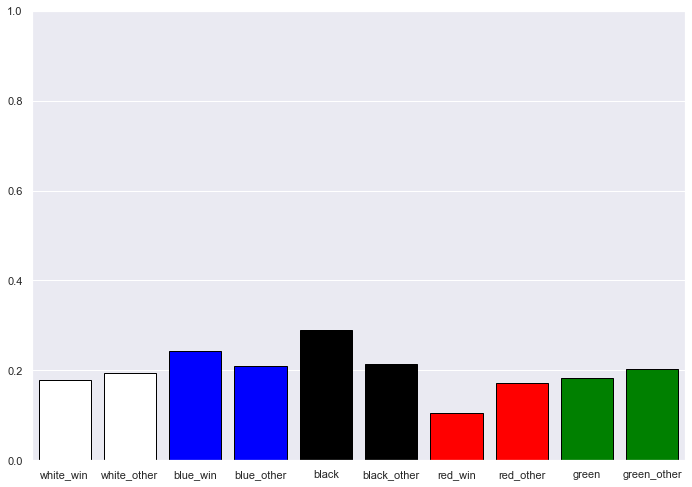

In [26]:
import math
colors = ["white","blue","black","red","green"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
dict = {
        "white_win": [winner_decklists['white'].sum()/len(winner_decklists.index)],
        "white_other": [other_decklists['white'].sum()/len(other_decklists.index)],
        "blue_win":  [winner_decklists['blue'].sum()/len(winner_decklists.index)],
        "blue_other":  [other_decklists['blue'].sum()/len(other_decklists.index)],
        "black": [winner_decklists['black'].sum()/len(winner_decklists.index)],
        "black_other": [other_decklists['black'].sum()/len(other_decklists.index)],
        "red_win": [winner_decklists['red'].sum()/len(winner_decklists.index)],
        "red_other": [other_decklists['red'].sum()/len(other_decklists.index)],
        "green": [winner_decklists['green'].sum()/len(winner_decklists.index)],
        "green_other": [other_decklists['green'].sum()/len(other_decklists.index)],
    }

data = pd.DataFrame.from_dict(dict)
plot = sns.barplot(data=data)
for i, bar in enumerate(plot.patches):
    num = math.floor(i/2)
    bar.set_color(colors[num])
    bar.set_edgecolor("black")
plot.set_ylim([0,1])

According to the data the colors rank at

1. black
1. blue
1. green
1. white
1. red

for both sets of decklists.
We also see that black is far more common and red is much less common among decklists that win, while white, blue, and green stay fairly even.

22.04


<AxesSubplot:ylabel='lands'>

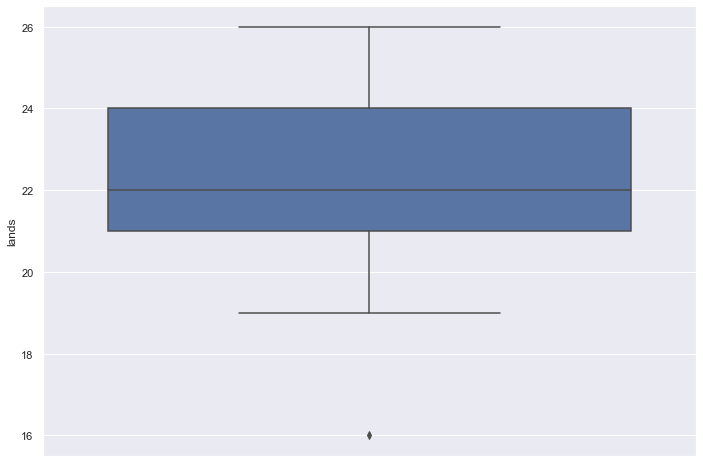

In [31]:
print(winner_decklists['lands'].mean())
sns.boxplot(y="lands",data=winner_decklists)

21.358974358974358


<AxesSubplot:ylabel='lands'>

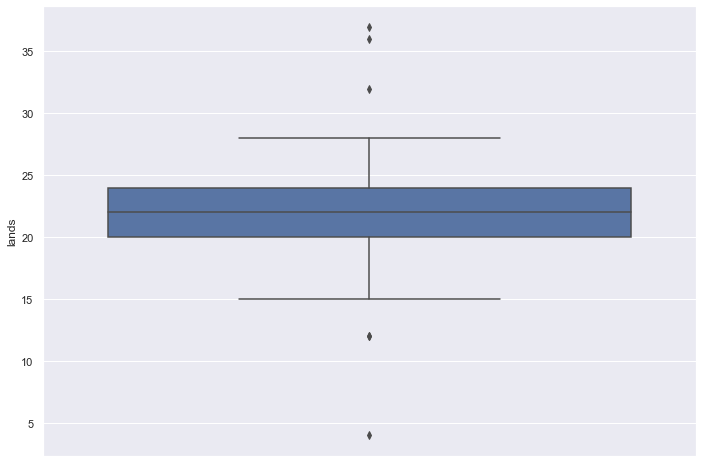

In [32]:
print(other_decklists['lands'].mean())
sns.boxplot(y="lands",data=other_decklists)

According the data, decklists that win use a slightly higher land count than the decklists that don't (22 vs 21), and the decklists that don't win see a much higher range in number of lands.

2.4442585005664785


<AxesSubplot:ylabel='mv'>

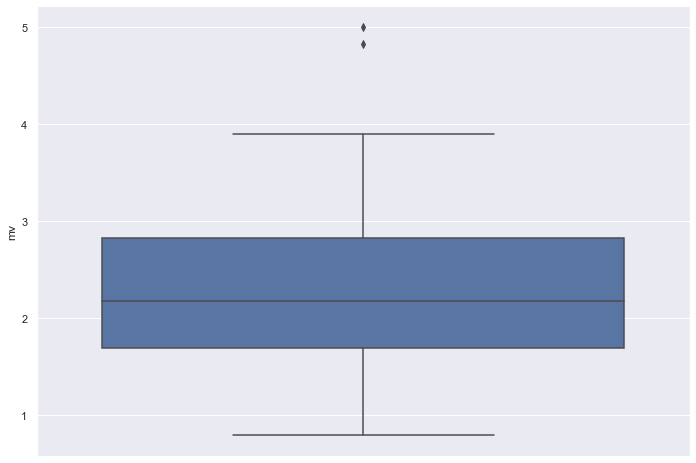

In [29]:
print(winner_decklists['mv'].mean())
sns.boxplot(y="mv",data=winner_decklists)

2.294733107375975


<AxesSubplot:ylabel='mv'>

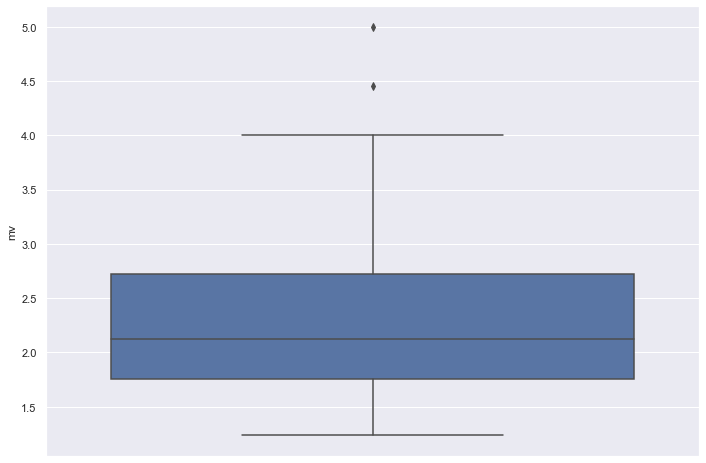

In [30]:
print(other_decklists['mv'].mean())
sns.boxplot(y="mv",data=other_decklists)

With the higher land count, it makes sense that the average mana value is also slightly higher for decklists that win. (2.4 vs 2.3)

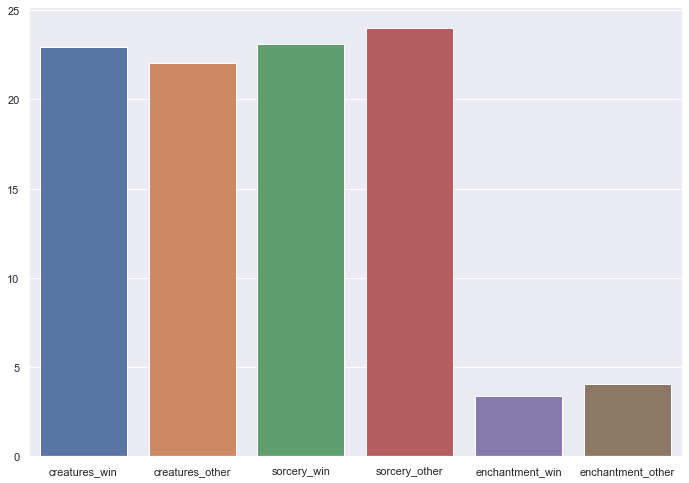

In [7]:
mv = pd.DataFrame.from_dict({
    "creatures_win": [winner_decklists['creature'].sum()/len(winner_decklists.index)], 
    "creatures_other": [other_decklists['creature'].sum()/len(other_decklists.index)],
    "sorcery_win": [winner_decklists['sorcery'].sum()/len(winner_decklists.index)], 
    "sorcery_other": [other_decklists['sorcery'].sum()/len(other_decklists.index)],
    "enchantment_win": [winner_decklists['enchant'].sum()/len(winner_decklists.index)], 
    "enchantment_other": [other_decklists['enchant'].sum()/len(other_decklists.index)]
})
plot = sns.barplot(data=mv)

This data says that the decks that win usually have about a 1:1 creature to sorcery ratio with a couple enchantments, while decks that don't win tend to have less creatures and more sorcery and enchantments. 

Based on the analysis, the most powerful deck would be a mono-black deck, with about 22 lands, an average mana value of 2.4, and an equal amount of spells and creatures with a couple enchantments.